# Ryan Timbrook
## Data Science 450, Spring 2017
## Date: 05/10/2017
## Assignment 3


# Use K-means clustering algorithm to cluster user sessions of an online shopping site into segments.

Try different clustering runs with various numbers of clusters (e.g., between 4 and 8), and select the result set(s) that seem to best answer as many of the following questions as possible

## Question 1:
If a new user is observed to access the following pages: Home => Search => Prod_B
### Q1.a: According to your clusters, what other product should be recommended to this user?
### Q1.b: What if the new user has accessed the following sequence instead: Products => Prod_C?


## Question 2: 
### Can clustering help us identify:
*	casual browsers ("window shoppers")
*	focused browsers (those who seem to know what products they are looking for)
*	searchers (those using the search function to ﬁnd items they want)? 
### If so, are any of these groups show a higher or lower propensity to make a purchase?


In [42]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
sess.df0 = read.data('Sessions.csv')

In [43]:
if(!require(factoextra)){install.packages("factoextra")}
names(sess.df0)
nrow(sess.df0)
str(sess.df0)
head(sess.df0)

[1] "Home"     "Products" "Search"   "Prod_A"   "Prod_B"   "Prod_C"   "Cart"    
[8] "Purchase"

[1] 100

'data.frame':	100 obs. of  8 variables:
 $ Home    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Products: int  0 1 0 1 0 1 0 0 1 0 ...
 $ Search  : int  0 1 0 1 1 1 1 1 1 1 ...
 $ Prod_A  : int  0 0 0 1 1 0 0 0 0 1 ...
 $ Prod_B  : int  0 0 0 0 1 1 0 1 1 1 ...
 $ Prod_C  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Cart    : int  0 1 0 1 1 0 1 0 1 1 ...
 $ Purchase: int  0 0 0 1 1 0 1 0 0 1 ...


Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase
1,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1
1,0,1,1,1,0,1,1
1,1,1,0,1,0,0,0


In [ ]:
sess.df1 = sess.df0[,c('Prod_A','Prod_B','Prod_C','Purchase')]


# K-means Partitioning
A plot of the within groups sum of squares by number of clusters extracted can help determine the appropriate number of clusters

Credits: http://www.statmethods.net/advstats/cluster.html

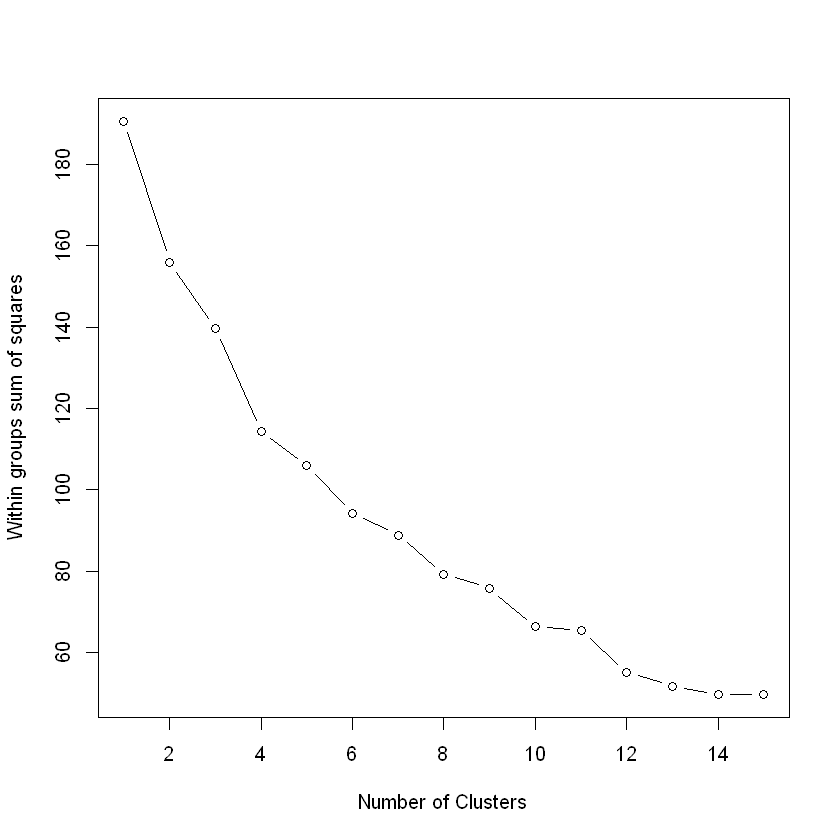

In [24]:
#Determine number of clusters
wss = (nrow(sessions.df)-1)*sum(apply(sessions.df,2,var))

for(i in 2:15) wss[i] = sum(kmeans(sessions.df,centers=i)$withinss)
plot(1:15,wss,type='b',xlab="Number of Clusters", ylab="Within groups sum of squares")

# K-means Cluster Analysis
The nstart argument teslls kmeans to try that many random starts and keep the best.
With 20 or 25 random starts, you'll generally find the overall best solution.
Credit: R12.KMC

In [25]:
sessions.4m1 = kmeans(sessions.df,4,nstart=25) # 4 clusters
sessions.4m1

K-means clustering with 4 clusters of sizes 28, 30, 22, 20

Cluster means:
       Home  Products    Search    Prod_A    Prod_B    Prod_C      Cart
1 0.0000000 1.0000000 0.3214286 0.0000000 1.0000000 0.6785714 0.5000000
2 0.7666667 0.6000000 0.4666667 0.8333333 0.3333333 0.3000000 1.0000000
3 0.8181818 0.6818182 0.0000000 0.8636364 0.3636364 0.2727273 0.4090909
4 0.9500000 0.5500000 1.0000000 0.4500000 0.4500000 0.5500000 0.4000000
   Purchase
1 0.3214286
2 1.0000000
3 0.0000000
4 0.0000000

Clustering vector:
  [1] 3 4 3 2 2 4 2 4 4 2 4 4 2 4 4 2 2 4 3 3 2 2 3 3 3 4 3 3 4 3 3 3 2 4 3 4 2
 [38] 1 1 1 1 1 1 1 1 1 1 2 4 4 2 4 2 3 3 2 3 4 2 2 4 3 2 2 3 4 3 2 4 2 2 2 2 3
 [75] 2 2 3 2 2 3 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 25.32143 37.16667 25.40909 25.55000
 (between_SS / total_SS =  40.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"      

In [26]:
#get cluster means
#aggregate(sessions.4m1,by=list(sessions.4m1$cluster),FUN=mean)
#append cluster assignment
#sessions.4m1 = data.frame(sessions.4m1,sessions.4m1$cluster)
#head(sessions.df)

# Plot Cluster

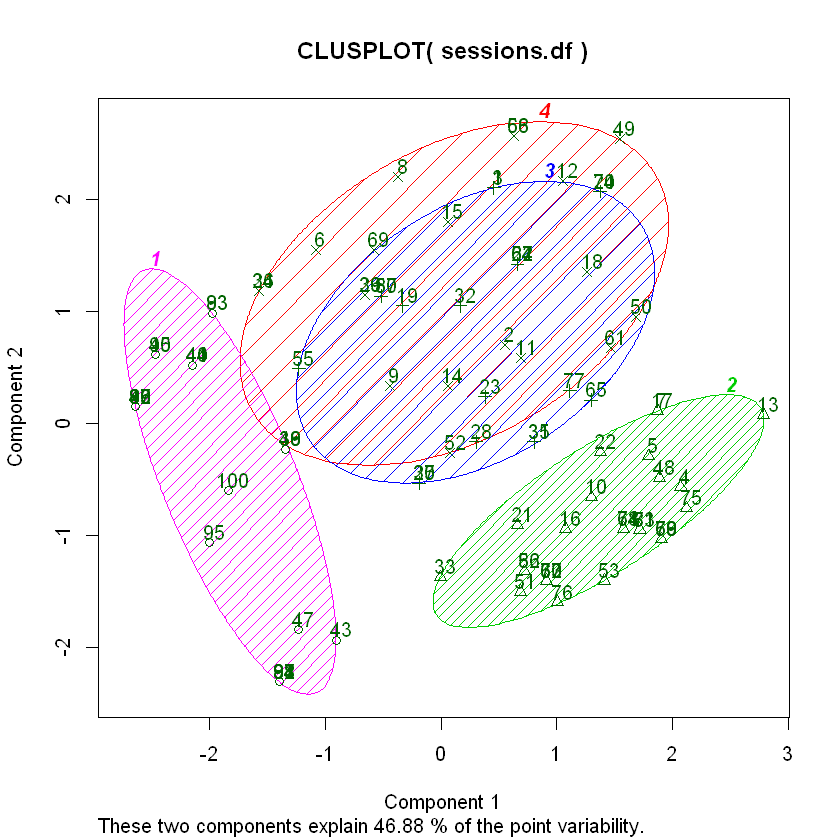

In [27]:
if(!require(cluster)){install.packages("cluster")}
#plot cluster
clusplot(sessions.df,sessions.4m1$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)


x,y
2.1415443,0.3521806
0.3010342,0.6685520
2.6218040,-0.8024843
1.3213860,1.2390889
-0.9119730,-0.0835273
1.9843365,1.4847659


[1] 198

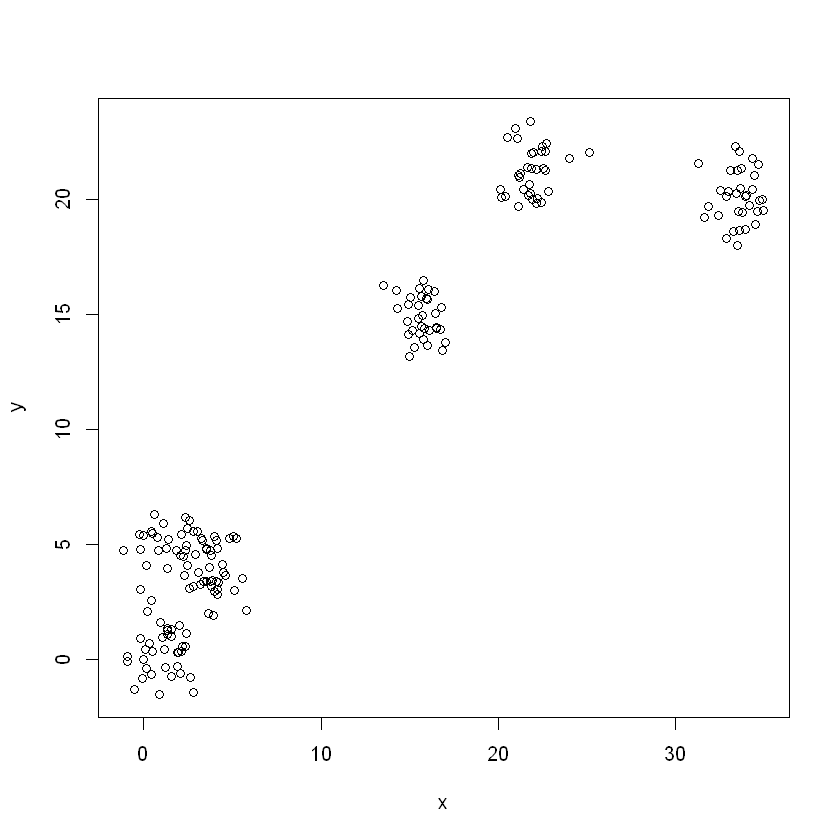

In [28]:
#Finding K
n = 200
g = 6
set.seed(g)
k.find.df = data.frame(x = unlist(lapply(1:g, function(i) rnorm(n/g, runif(1)*i^2))),
                y = unlist(lapply(1:g, function(i) rnorm(n/g, runif(1)*i^2))))
head(k.find.df)
nrow(k.find.df)
plot(k.find.df)

In [29]:
sessions.df.scaled = scale(sessions.df)
set.seed(777)
km.scalled.4m = kmeans(sessions.df.scaled,4,nstart=25)
km.scalled.4m$cluster

[1] 4 3 4 2 2 3 2 3 3 2 3 3 2 3 3 2 2 3 4 4 2 2 4 4 4 3 4 4 3 4 4 4 2 3 4 3 2
 [38] 1 1 1 1 1 1 1 1 1 1 2 3 3 2 3 2 4 4 2 4 3 2 2 3 4 2 2 4 3 4 2 3 2 2 2 2 4
 [75] 2 2 4 2 2 4 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

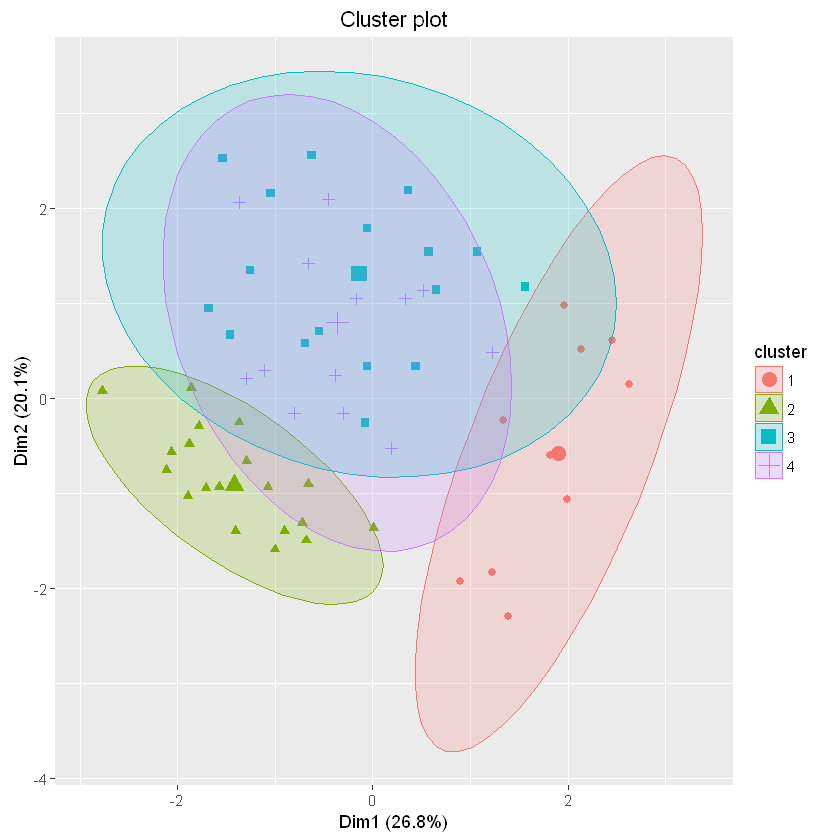

In [30]:
#Visualize k-means clusters
fviz_cluster(km.scalled.4m,data=sessions.df.scaled,geom='point',stand=FALSE,frame.type = 'norm')

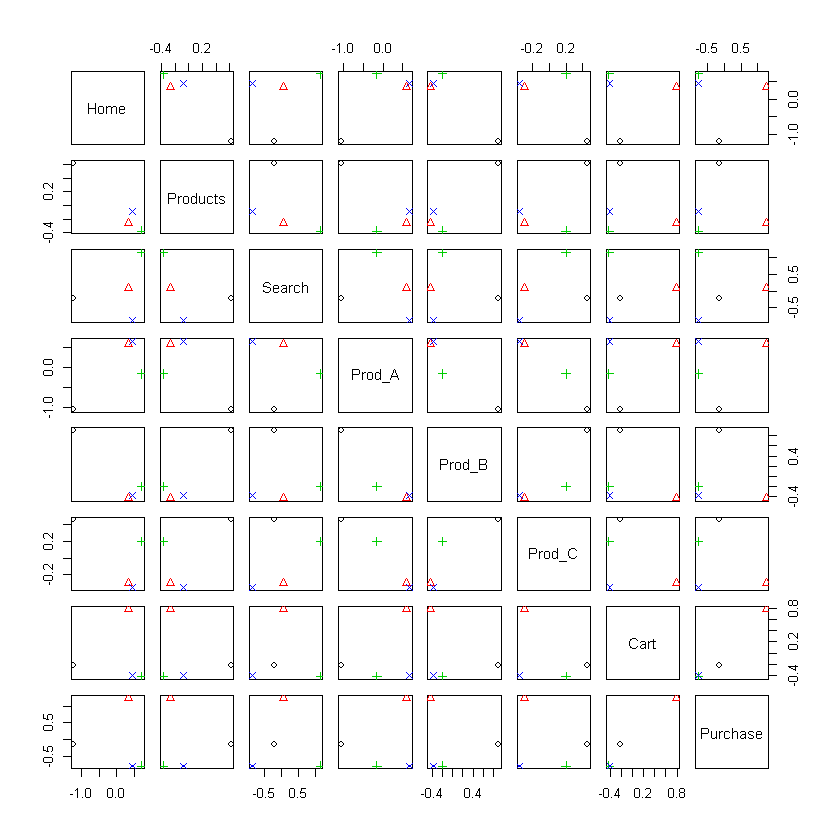

In [31]:
pairs(km.scalled.4m$centers, pch=1:4,col=1:4)

# K-means Partitioning
# Finding Elbow

A plot of the within groups sum of squares by number of clusters extracted can help determine the appropriate number of clusters

Credits: http://www.statmethods.net/advstats/cluster.html


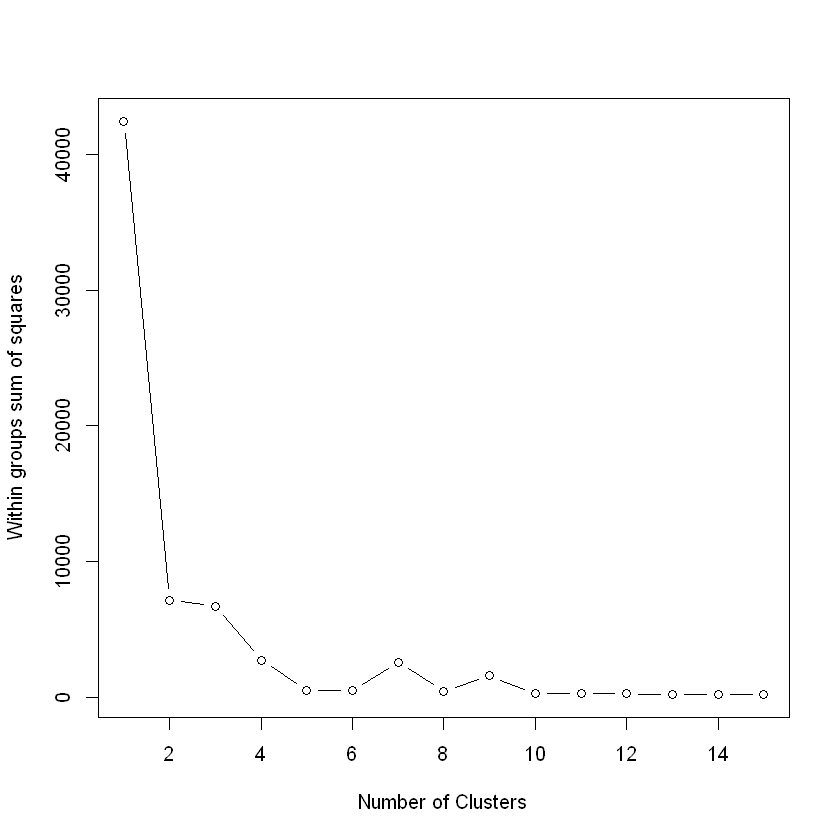

In [32]:
elbow.df = k.find.df
#Determine number of clusters
wss = (nrow(elbow.df)-1)*sum(apply(elbow.df,2,var))

for(i in 2:15) wss[i] = sum(kmeans(elbow.df,centers=i)$withinss)
plot(1:15,wss,type='b',xlab="Number of Clusters", ylab="Within groups sum of squares")

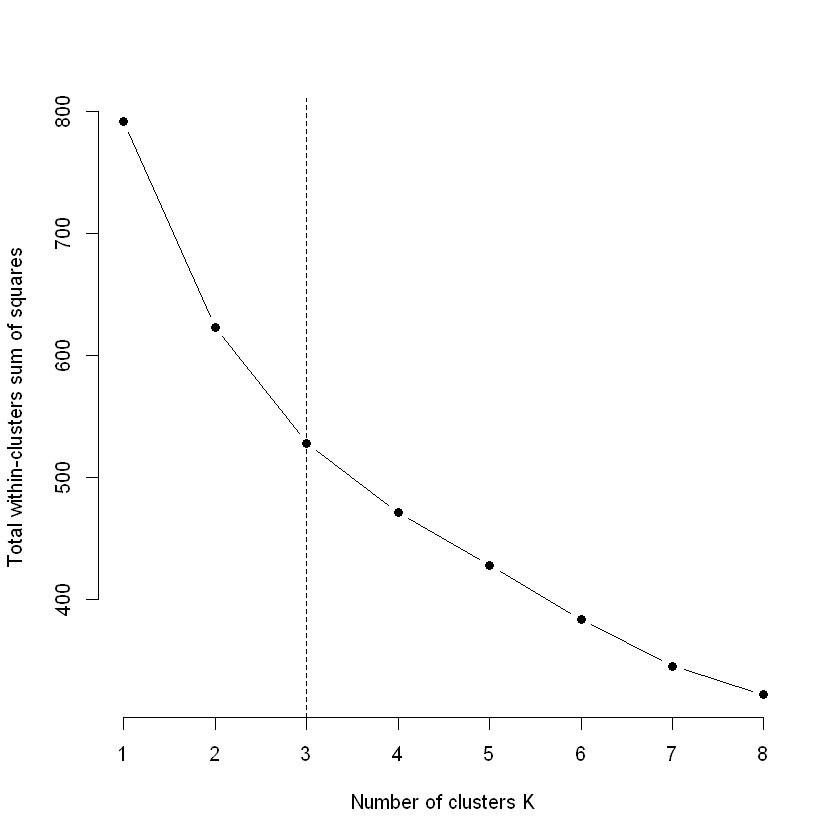

In [33]:
max.k = 8 #Max number of clusters
df = sessions.df.scaled
wss = sapply(1:max.k, function(k){kmeans(df, k, nstart=10)$tot.withinss})
plot(1:max.k, wss, type="b", pch=19, frame=FALSE, xlab="Number of clusters K", ylab="Total within-clusters sum of squares")
abline(v=3,lty=2)

# Use Silhouette plot and Partition around mediods


Silhouette Cluster Estimation:  4 


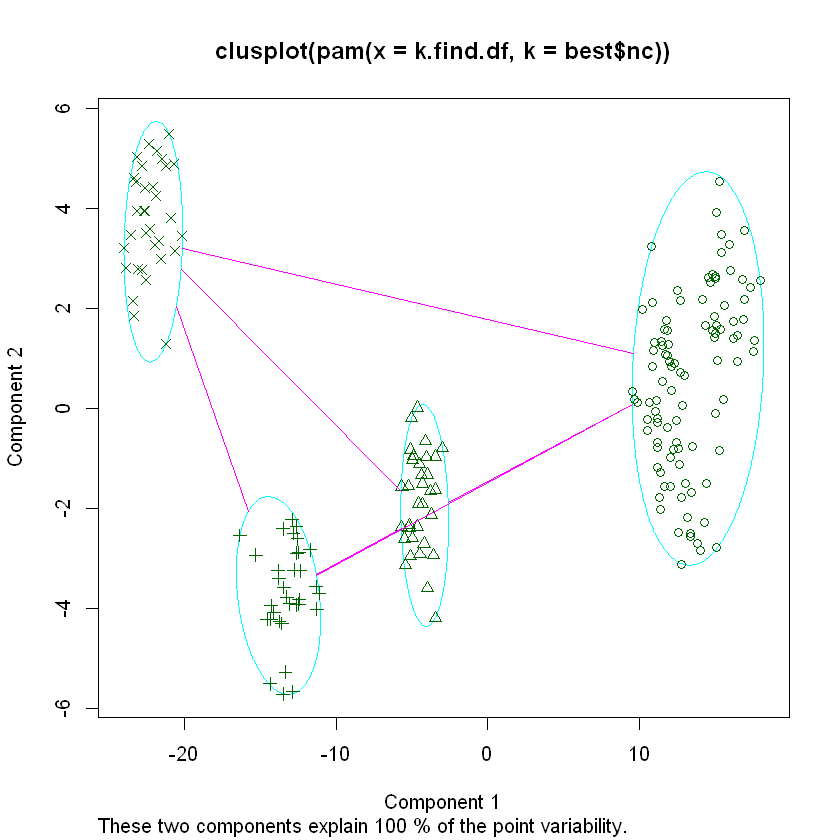

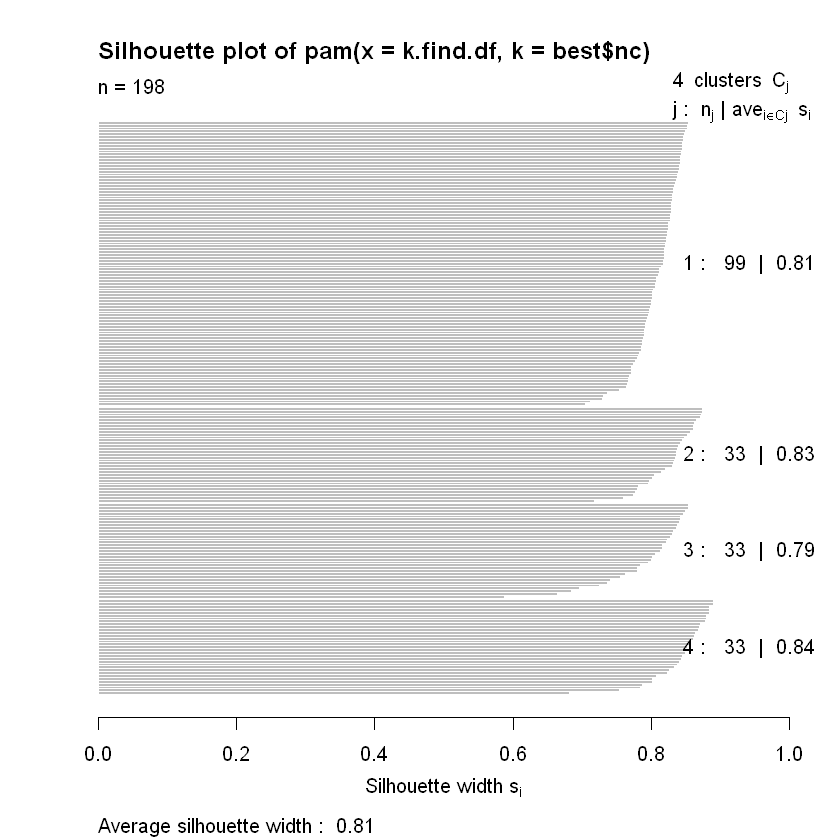

In [34]:
if(!require(fpc)){install.packages("fpc")}
best = pamk(k.find.df)
cat("Silhouette Cluster Estimation: ",best$nc,"\n")
plot(pam(k.find.df,best$nc))

# Partion Clustering Using NbClust

In [35]:
if(!require(NbClust)){install.packages("NbClust")}
set.seed(766)
nb.clust = NbClust(sessions.df.scaled, distance='euclidean', min.nc=2, max.nc=10, method="complete", index="gap")
nb.clust

$All.index
      2       3       4       5       6       7       8       9      10 
-2.4808 -3.1454 -3.4101 -3.6939 -3.9603 -4.4020 -4.5922 -4.6748 -4.6119 

$All.CriticalValues
      2       3       4       5       6       7       8       9      10 
 0.6739  0.2762  0.2984  0.2832  0.4639  0.2158  0.1101 -0.0349  0.2701 

$Best.nc
Number_clusters     Value_Index 
         2.0000         -2.4808 

$Best.partition
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1
 [75] 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [36]:
#gap statistic values
nb.clust$All.index

2       3       4       5       6       7       8       9      10 
-2.4808 -3.1454 -3.4101 -3.6939 -3.9603 -4.4020 -4.5922 -4.6748 -4.6119

In [37]:
#best number of clusters
nb.clust$Best.nc

Number_clusters     Value_Index 
         2.0000         -2.4808

In [38]:
nb.clust$Best.partition

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1
 [75] 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# Hubert Index - Graphical method of determining the number of clusters

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


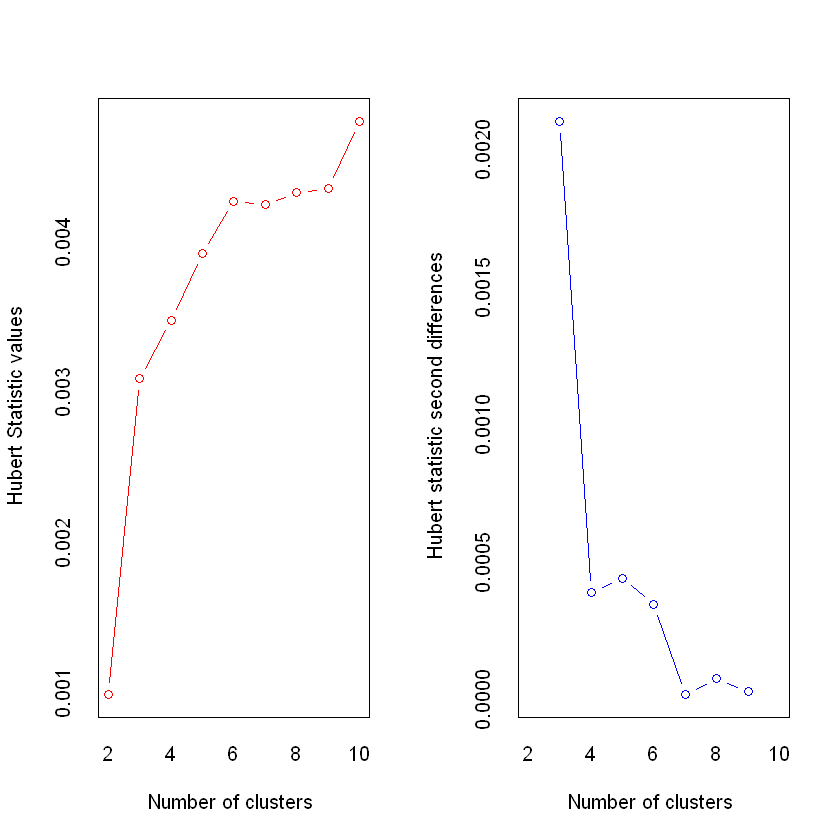

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 5 proposed 6 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 8 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  10 
 
 
******************************************************************* 


$All.index
        KL      CH Hartigan     CCC    Scott      Marriot    TrCovW   TraceW
2   1.5135  6.6370  18.3048 -7.8289  54.6027 5.178682e+15 12292.275 741.7644
3   0.9801 12.9572  15.5446 -6.4130 287.2379 1.137837e+15  9235.053 625.0208
4   2.6303 15.0472   8.6810 -5.1823 412.8296 5.761290e+14  6854.034 538.6932
5   0.3881 14.3254  13.1419 -5.4999 558.2992 2.101712e+14  6200.267 494.0204
6  71.0200 15.5090   3.5729 -3.5807 630.8150 1.465560e+14  4422.098 433.9849
7   0.0661 13.8619   4.9821 -4.6326 681.6351 1.200019e+14  4213.938 418.0935
8   0.7129 13.0876   5.3409 -4.5822 723.8253 1.027880e+14  3784.758 396.8346
9   0.2017 12.6451  17.0838 -4.2831 771.3854 8.085307e+13  3634.580 375.0610
10  5.6087 15.0809   4.8221 -0.2688 846.6034 4.704831e+13  2214.323 315.7786
   Friedman  Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky
2    0.8220 1.0677 0.6667 2.2000     0.0615 0.8318  17.3847 1.0561    0.1502
3    9.9903 1.2672 0.6580 1.9823     0.1121 0.7962  15.6133 1.3310    0.2348
4   13.9021 1.4702 0.6458 1.9203     0.1478 0.7098   9.4056 2.0713    0.2570
5   24.3000 1.6032 0.6273 1.8527     0.1620 0.7203  13.5925 1.9955    0.2490
6   26.2441 1.8249 0.6251 1.7584     0.1875 0.7160   4.3628 1.9215    0.2608
7   29.5797 1.8943 0.6205 1.5886     0.1755 0.6473   5.9936 2.6398    0.2488
8   31.3962 1.9958 0.6151 1.5326     0.1777 0.5553   8.0075 3.8474    0.2413
9   32.5859 2.1117 0.6090 1.4615     0.1883 0.5167  22.4518 4.7465    0.2354
10  34.5277 2.5081 0.6012 1.3731     0.2449 0.6619   5.1069 2.4537    0.2417
       Ball Ptbiserial    Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2  370.8822     0.0633 -0.6208  0.2611 0.3462 0.0010  1.5482 2.6991 0.8303
3  208.3403     0.3644  0.2192  0.9456 0.3749 0.0031  1.3184 2.4819 0.8039
4  134.6733     0.4398  0.0905  2.0426 0.4042 0.0035  1.2899 2.2984 0.7730
5   98.8041     0.4616  0.0631  2.3408 0.4047 0.0039  1.2854 2.1965 0.7239
6   72.3308     0.5188  0.1012  3.1276 0.4436 0.0043  1.2660 2.0503 0.6764
7   59.7276     0.5216  0.1845  3.2006 0.4439 0.0043  1.1418 2.0083 0.6264
8   49.6043     0.5225  0.1557  3.3530 0.4453 0.0043  1.0963 1.9468 0.5923
9   41.6734     0.5239  0.0540  3.4810 0.4457 0.0044  1.1150 1.8872 0.5675
10  31.5779     0.5587  0.1070  4.0902 0.4823 0.0048  1.1500 1.6835 0.5128

$All.CriticalValues
   CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2          0.7587            27.3468       0.3923
3          0.7293            22.6388       0.2256
4          0.6171            14.2731       0.0407
5          0.6711            17.1559       0.0470
6          0.4997            11.0113       0.0665
7          0.4997            11.0113       0.0122
8          0.4826            10.7225       0.0007
9          0.6230            14.5259       0.0000
10         0.4826            10.7225       0.0198

$Best.nc
                   KL     CH Hartigan     CCC    Scott      Marriot   TrCovW
Number_clusters  6.00  6.000  10.0000 10.0000   3.0000 3.000000e+00    3.000
Value_Index     71.02 15.509  12.2617 -0.2688 232.6352 3.479137e+15 3057.222
                TraceW Friedman   Rubin  Cindex      DB Silhouette   Duda
Number_clusters  6.000   5.0000  6.0000 10.0000 10.0000    10.0000 2.0000
Value_Index     44.144  10.3979 -0.1524  0.6012  1.3731     0.2449 0.8318
                PseudoT2  Beale Ratkowsky     Ball PtBiserial Frey McClain
Number_clusters   2.0000 2.0000    6.0000   3.0000    10.0000    1  2.0000
Value_Index      17.3847 1.0561    0.2608 162.5419     0.5587   NA  0.2611
                   Dunn Hubert SDindex Dindex    SDbw
Number_clusters 10.0000      0  8.0000      0 10.0000
Value_Index      0.4823      0  1.0963      0  0.5128

$Best.partition
  [1]  1  2  1  3  4  5  6  1  5  4  7  7  6  5  7  3  6  6  8  1  3  6  2  8  2
 [26]  5  2  2  5  2  2  2  3  5  2  5  3  5  5  8  8  5  9  8  5  5  9  4  1  7
 [51] 10 10  3  8  8  4  8  1  3  3  2  8  3  3  2  1  8  3  5  3  3  3  4  1  4
 [76]  3  8  3  3  8  4  4  5  9  5  5  5  9  5  5  9  9  5  9  5  5

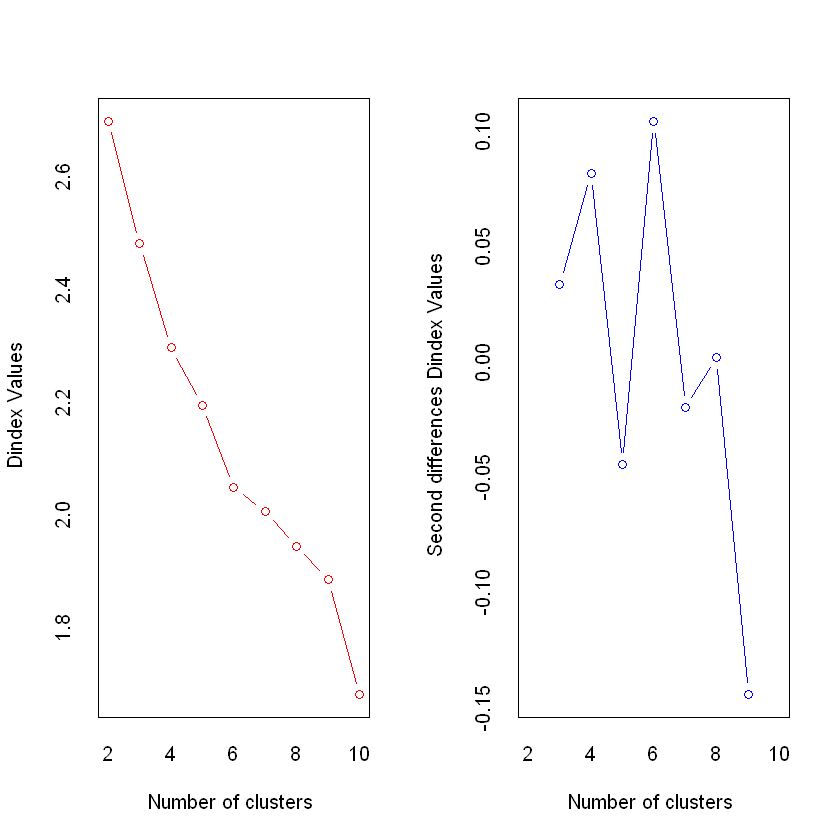

In [41]:
hbrt = NbClust(sessions.df.scaled,distance="euclidean", min.nc=2, max.nc=10,method='complete',index='all')
hbrt

Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  1 as the best number of clusters
* 4 proposed  2 as the best number of clusters
* 4 proposed  3 as the best number of clusters
* 1 proposed  5 as the best number of clusters
* 5 proposed  6 as the best number of clusters
* 1 proposed  8 as the best number of clusters
* 8 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  10 .



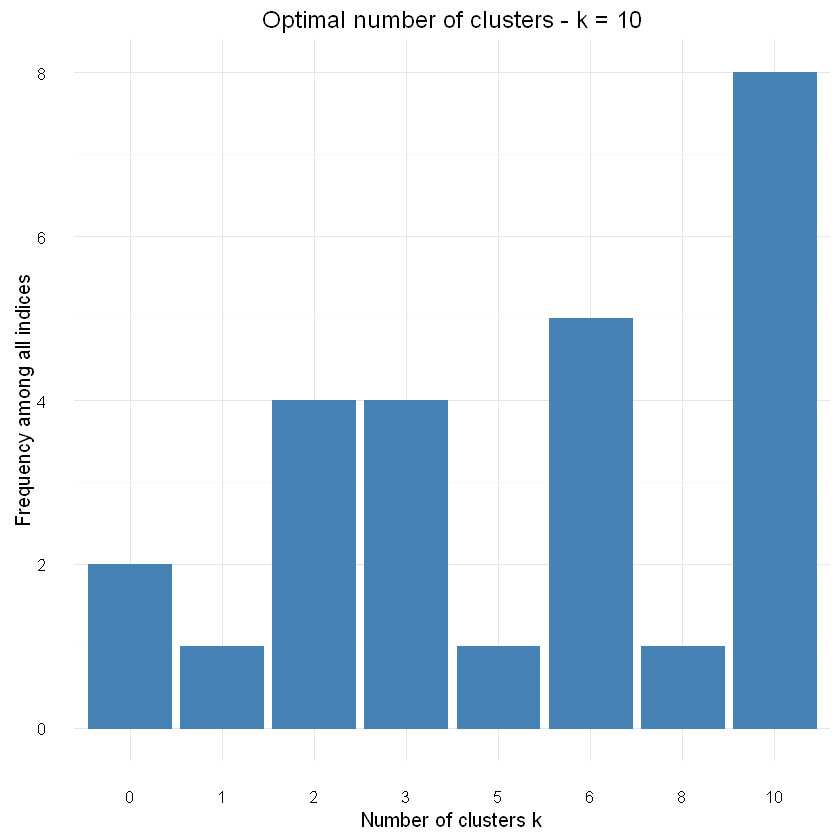

In [40]:
fviz_nbclust(hbrt) + theme_minimal()

# Best Cluster Size (3) - Cluster Analysis

kcca object of family 'kmeans' 

call:
kcca(x = sessions.df[sessions.df[["train"]] == TRUE, 1:2], k = 3, 
    family = kccaFamily("kmeans"))

cluster sizes:

 1  2  3 
14 31 25 


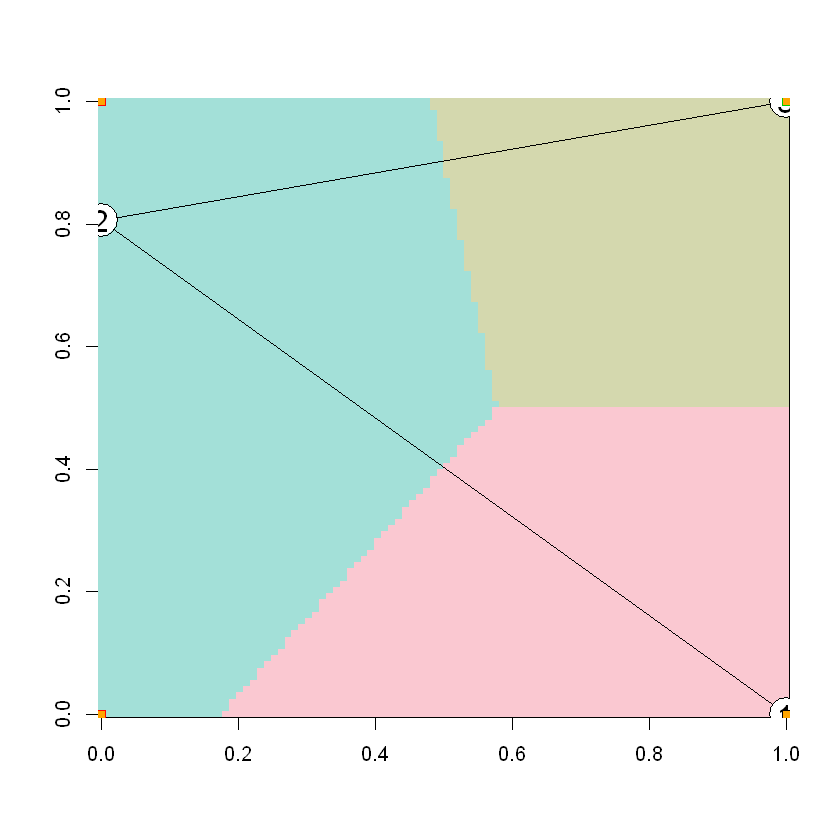

In [78]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")

# Read Data Source
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}
sessions.df = read.data('Sessions.csv')
if(!require(dplyr)){install.packages("dplyr")}
if(!require(flexclust)){install.packages("flexclust")}

set.seed(1)
ind = sample(nrow(sessions.df), 30)
sessions.df[["train"]] = TRUE
sessions.df[["train"]][ind] = FALSE

cl3 = kcca(sessions.df[sessions.df[["train"]] == TRUE, 1:2], k=3, kccaFamily("kmeans"))
cl3

pred.train <- predict(cl3)
pred.test <- predict(cl3, newdata=sessions.df[sessions.df[["train"]]==FALSE, 1:2])

image(cl3)
points(sessions.df[sessions.df[["train"]]==TRUE, 1:2], col=pred.train, pch=19, cex=0.3)
points(sessions.df[sessions.df[["train"]]==FALSE, 1:2], col=pred.test, pch=22, bg="orange")



In [79]:
k3 = kmeans(sessions.df,3) # 3 clusters
k3
#get cluster means
aggregate(sessions.df,by=list(k3$cluster),FUN=mean)
#append cluster assignment
sessions.df = data.frame(sessions.df,k3$cluster)
head(sessions.df)

K-means clustering with 3 clusters of sizes 24, 45, 31

Cluster means:
        Home  Products    Search     Prod_A    Prod_B    Prod_C      Cart
1 0.87500000 0.6666667 0.4166667 0.75000000 0.5000000 0.3750000 0.5416667
2 0.84444444 0.5777778 0.5111111 0.73333333 0.2666667 0.3555556 0.7555556
3 0.03225806 0.9677419 0.3225806 0.06451613 1.0000000 0.6451613 0.4516129
   Purchase     train
1 0.3750000 0.0000000
2 0.4666667 1.0000000
3 0.2903226 0.8064516

Clustering vector:
  [1] 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 3 1 1 1 2 2 1 2 1 2 2 1
 [38] 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 2 2 3 2 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2
 [75] 1 2 2 2 2 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 41.50000 75.55556 36.58065
 (between_SS / total_SS =  27.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Group.1,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train
1,0.87500000,0.6666667,0.4166667,0.75000000,0.5000000,0.3750000,0.5416667,0.3750000,0.0000000
2,0.84444444,0.5777778,0.5111111,0.73333333,0.2666667,0.3555556,0.7555556,0.4666667,1.0000000
3,0.03225806,0.9677419,0.3225806,0.06451613,1.0000000,0.6451613,0.4516129,0.2903226,0.8064516


Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
1,0,0,0,0,0,0,0,FALSE,1
1,1,1,0,0,0,1,0,TRUE,2
1,0,0,0,0,0,0,0,TRUE,2
1,1,1,1,0,0,1,1,TRUE,2
1,0,1,1,1,0,1,1,TRUE,2
1,1,1,0,1,0,0,0,FALSE,1


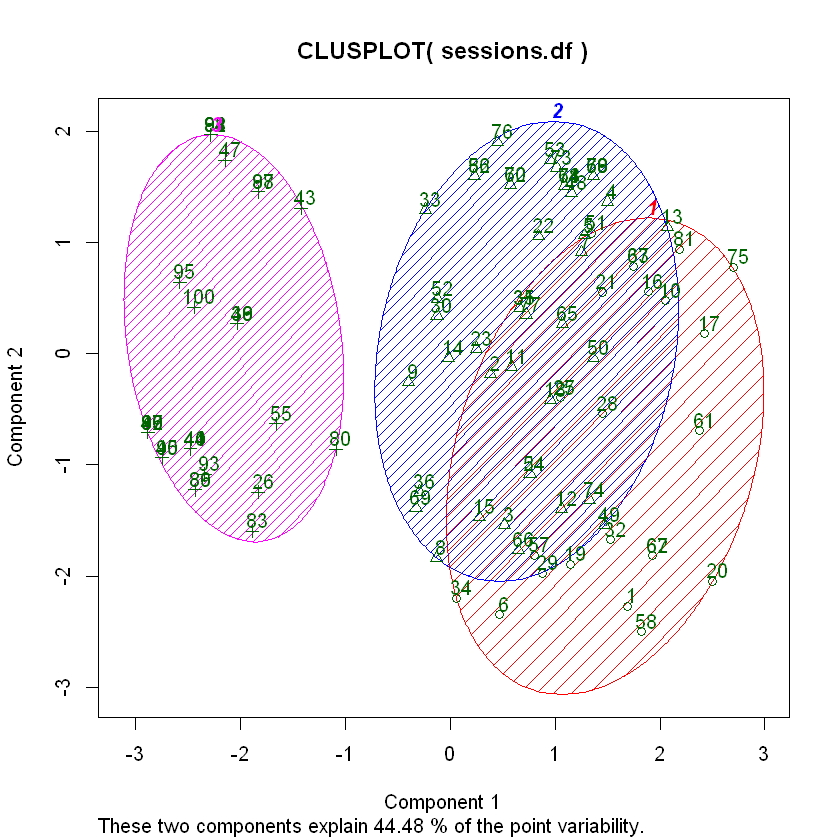

In [80]:
if(!require(cluster)){install.packages("cluster")}
#plot cluster
clusplot(sessions.df,k3$cluster,color=TRUE,shade=TRUE,labels=2,lines=0)


In [81]:
df.c1 = sessions.df[which(sessions.df$k3.cluster == 1),]
nrow(df.c1)
#head(df.c1)
# Path 1 - Home => Search => Prod_B
q1.c1 = df.c1[which(df.c1$Home == 1 & df.c1$Search == 1 & df.c1$Prod_B == 1),]
q1.c1.percent = round(nrow(q1.c1)/nrow(df.c1)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c1)," of ",nrow(df.c1), " Q1 Path Frequencey: ",q1.c1.percent,"%")
q1.c1
# What Product next, Prod_A?
q1.c1.prod_a = q1.c1[which(q1.c1$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c1.prod_a),' of ', nrow(q1.c1))
q1.c1.prod_a

# What Product next, Prod_C?
q1.c1.prod_c = q1.c1[which(q1.c1$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c1.prod_c),' of ', nrow(q1.c1))
q1.c1.prod_c

# Path 2 - Products => Prod_B
q1.c1.p = df.c1[which(df.c1$Home == 1 & df.c1$Search == 1 & df.c1$Prod_B == 1),]

[1] 24

[1] "Q1 Path Observations:5 of 24 Q1 Path Frequencey: 20.83%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
6,1,1,1,0,1,0,0,0,FALSE,1
10,1,0,1,1,1,1,1,1,FALSE,1
16,1,1,1,1,1,0,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1


[1] "Prod_A Observations of Q1 Path: 3 of 5"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
10,1,0,1,1,1,1,1,1,FALSE,1
16,1,1,1,1,1,0,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1


[1] "Prod_C Observations of Q1 Path: 3 of 5"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
10,1,0,1,1,1,1,1,1,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1


In [83]:
df.c2 = sessions.df[which(sessions.df$k3.cluster == 2),]
nrow(df.c2)
#head(df.c2)
q1.c2 = df.c2[which(df.c2$Home == 1 & df.c2$Search == 1 & df.c2$Prod_B == 1),]
q1.c2.percent = round(nrow(q1.c2)/nrow(df.c2)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c2)," of ",nrow(df.c2), " Q1 Path Frequencey: ",q1.c2.percent, '%')
q1.c2

# What Product next, Prod_A?
q1.c2.prod_a = q1.c2[which(q1.c2$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c2.prod_a),' of ', nrow(q1.c2))
q1.c2.prod_a

# What Product next, Prod_C?
q1.c2.prod_c = q1.c2[which(q1.c2$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c2.prod_c),' of ', nrow(q1.c2))
q1.c2.prod_c

[1] 45

[1] "Q1 Path Observations:6 of 45 Q1 Path Frequencey: 13.33%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
5,1,0,1,1,1,0,1,1,TRUE,2
8,1,0,1,0,1,0,0,0,TRUE,2
9,1,1,1,0,1,0,1,0,TRUE,2
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


[1] "Prod_A Observations of Q1 Path: 4 of 6"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
5,1,0,1,1,1,0,1,1,TRUE,2
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


[1] "Prod_C Observations of Q1 Path: 3 of 6"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
11,1,0,1,1,1,1,1,0,TRUE,2
15,1,0,1,1,1,1,0,0,TRUE,2
36,1,1,1,1,1,1,0,0,TRUE,2


In [86]:
df.c3 = sessions.df[which(sessions.df$k3.cluster == 3),]
nrow(df.c3)
#head(df.c3)
q1.c3 = df.c3[which(df.c3$Home == 1 & df.c3$Search == 1 & df.c3$Prod_B == 1),]
q1.c3.percent = round(nrow(q1.c3)/nrow(df.c3)*100,2)
paste0("Q1 Path Observations:",nrow(q1.c3)," of ",nrow(df.c3), " Q1 Path Frequencey: ",q1.c3.percent, '')
q1.c3

# What Product next, Prod_A?
q1.c3.prod_a = q1.c3[which(q1.c3$Prod_A == 1),]
paste0("Prod_A Observations of Q1 Path: ",nrow(q1.c3.prod_a),' of ', nrow(q1.c3))
q1.c3.prod_a

# What Product next, Prod_C?
q1.c3.prod_c = q1.c3[which(q1.c3$Prod_C == 1),]
paste0("Prod_C Observations of Q1 Path: ",nrow(q1.c3.prod_c),' of ', nrow(q1.c3))
q1.c3.prod_c


[1] 31

[1] "Q1 Path Observations:1 of 31 Q1 Path Frequencey: 3.23%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3


[1] "Prod_A Observations of Q1 Path: 0 of 1"

Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster


[1] "Prod_C Observations of Q1 Path: 1 of 1"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
26,1,1,1,0,1,1,0,0,TRUE,3


# Path 2 - Product => Prod_C

In [95]:
df.c1.p2 = sessions.df[which(sessions.df$k3.cluster == 1),]
q1.c1.p2 = df.c1.p2[which(df.c1.p2$Product == 1 & df.c1.p2$Prod_C == 1),]
q1.c1.p2.percent = round(nrow(q1.c1.p2)/nrow(df.c1.p2)*100,2)
paste0("Q1.b Path Observations:",nrow(q1.c1.p2)," of ",nrow(df.c1.p2), " Q1.b Path Frequencey: ",q1.c1.p2.percent, '%')
q1.c1.p2

# What Product next, Prod_A?
q1.c1.p2.prod_a = q1.c1.p2[which(q1.c1.p2$Prod_A == 1),]
paste0("Prod_A Observations of Q1.b Path: ",nrow(q1.c1.p2.prod_a),' of ', nrow(q1.c1.p2))
q1.c1.p2.prod_a

# What Product next, Prod_C?
q1.c1.p2.prod_b = q1.c1.p2[which(q1.c1.p2$Prod_B == 1),]
paste0("Prod_B Observations of Q1.b Path: ",nrow(q1.c1.p2.prod_b),' of ', nrow(q1.c1.p2))
q1.c1.p2.prod_b

[1] "Q1.b Path Observations:7 of 24 Q1.b Path Frequencey: 29.17%"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
21,1,1,1,0,0,1,1,1,FALSE,1
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
32,1,1,0,1,0,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1
51,0,1,1,1,0,1,1,1,FALSE,1


[1] "Prod_A Observations of Q1.b Path: 5 of 7"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
32,1,1,0,1,0,1,0,0,FALSE,1
51,0,1,1,1,0,1,1,1,FALSE,1


[1] "Prod_B Observations of Q1.b Path: 4 of 7"

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,train,k3.cluster
25,1,1,0,1,1,1,1,0,FALSE,1
27,1,1,0,1,1,1,1,0,FALSE,1
29,1,1,1,1,1,1,0,0,FALSE,1
34,1,1,1,0,1,1,0,0,FALSE,1
